In [1]:
from pyGEDI import *

With GEDI data it is possible to propose and explore questions of scale, data fusion, and fundamental aspects of vegetation. The next notebook will demonstrate how to combine GEDI data with mission G-LiHT: Goddard's LiDAR, Hyperspectral & Thermal Imager https://gliht.gsfc.nasa.gov/

#### Please note you will need these packages:

In [2]:
import geopandas as gpd
from scipy.stats import gaussian_kde

The following data analyses are from Yucatan, Mexico where various variables were calculated that pertain to GEDI product 2A. Variables:

- tcc
- tch75
- tch90
- tch95
- tch100

are the percentile result from layer rh.  

#### To visualize in shp format and an attributes table

,lat,lon,year,day,tcc,tch75,tch90,tch95,tch100,geometry
0,20.999765,-88.561921,2019.0,137.0,3.0,1.0,2.0,2.0,5.0,POINT (-88.56192 20.99977)
1,20.998962,-88.561226,2019.0,137.0,22.0,2.0,4.0,5.0,8.0,POINT (-88.56123 20.99896)
2,20.998559,-88.560878,2019.0,137.0,13.0,1.0,4.0,6.0,9.0,POINT (-88.56088 20.99856)
3,20.998158,-88.560531,2019.0,137.0,19.0,2.0,4.0,5.0,7.0,POINT (-88.56053 20.99816)
4,20.997757,-88.560184,2019.0,137.0,46.0,6.0,8.0,9.0,11.0,POINT (-88.56018 20.99776)


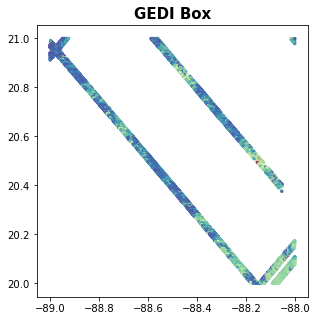

In [3]:
GEDI_shp = gpd.read_file('data/formats/Yucatan.shp')
plotSHP(GEDI_shp,'tch75',colormap='Spectral_r')
GEDI_shp.head()

Select the rasters created by pyGEDI from the previous notebook product 2A and read raster G-LiHT.

In [4]:
gliht = 'data/formats/GLiHT_yucatan.tif'
gliht_dataset = gdal.Open(gliht)
gliht_raster = gliht_dataset.GetRasterBand(1)
noDataVal = gliht_raster.GetNoDataValue()
scaleFactor = gliht_raster.GetScale()    
cols = gliht_dataset.RasterXSize; 
rows = gliht_dataset.RasterYSize;
gliht_array = gliht_dataset.GetRasterBand(1).ReadAsArray(0,0,cols,rows).astype(np.float)

GEDI_raster = 'data/formats/tch75_yucatan.tif'
gedi_dataset = gdal.Open(GEDI_raster)
gedi_raster = gedi_dataset.GetRasterBand(1)
noDataVal = gedi_raster.GetNoDataValue()
scaleFactor = gedi_raster.GetScale()    
cols = gedi_dataset.RasterXSize; 
rows = gedi_dataset.RasterYSize;
gedi_array = gedi_dataset.GetRasterBand(1).ReadAsArray(0,0,cols,rows).astype(np.float)

Now that the array's have been created it is necessary to find the pixel overlap of both products. The next example filters the height of GEDI at 30m to avoid outliers and a height of 2m to eliminate background noise.

In [5]:
array_GLiHT=[]
array_GEDI=[]
for i in range(gedi_array.shape[0]):
    for j in range(gedi_array.shape[1]):
        if gliht_array[j][i]>=2 and gedi_array[j][i]>=2 and gedi_array[j][i]<30:
            array_GEDI+=[gedi_array[j][i]]
            array_GLiHT+=[gliht_array[j][i]]

Scaterplot of correlation between GEDI and GLiht somewhere in Yucatan, Mexico.

In [6]:
y = array_GLiHT
x= array_GEDI

In [7]:
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

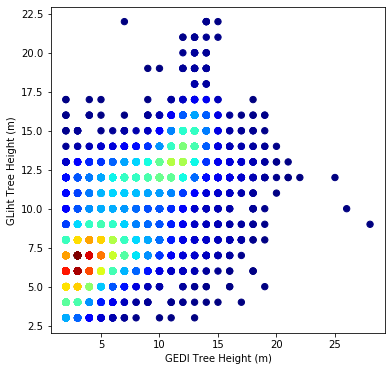

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, c=z, s=40,cmap=plt.cm.jet)
plt.xlabel('GEDI Tree Height (m)'); plt.ylabel('GLiht Tree Height (m)')
plt.show()